## Demo for modelling dual-channel PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
main_data_dir = io.param.load('datapath.yaml').main_data_dir
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/2ch_smlm_nup96_WGA/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.05
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.roi.roi_size = [21,21]
L.param.batch_size = 1000 # lower this number if out of memory
L.param.option.model.const_pupilmag = True
L.param.option.imaging.emission_wavelength = 0.67 # micron
L.param.option.model.n_max = 6
L.param.option.insitu.z_range = 1.2
L.param.option.insitu.repeat=2

#### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:/EMBL files/data for PSF learning/example data for uiPSF//2ch_smlm_nup96_WGA\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (16094, 21, 21)
rois shape channel 1: (8603, 21, 21)
rois shape channel 0: (5122, 21, 21)
rois shape channel 1: (5122, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:00s]  1.19it/s total time: 0.83s
5/6: localization: 2/2 [00:00s] 14.87it/s total time: 0.97s
3/6: learning: 53/100 [00:27s]  1.94it/s, current loss: 0.72684, total time: 27.38s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.16it/s total time: 28.23s
5/6: localization: 2/2 [00:00s] 17.87it/s total time: 28.34s
3/6: learning: 53/100 [00:27s]  1.95it/s, current loss: 0.42280, total time: 54.50s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.16it/s total time: 1.70s
5/6: localization: 2/2 [00:13s]  6.64s/it total time: 14.98s
c:\Users\Sheng\Documents\git\python\uiPSF\demo\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 206/250 [01:23s]  2.46it/s, current loss: 1.01789, total time: 138.23s


outlier percentage: 0.2519561815336463
rois shape channel 0: (956, 21, 21)
rois shape channel 1: (956, 21, 21)


3/6: learning: 204/250 [00:45s]  4.49it/s, current loss: 0.99473, total time: 183.71s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.14it/s total time: 1.75s
5/6: localization: 2/2 [00:00s]  2.70it/s total time: 2.49s
6/6: saving results: [00:02s] total time: 4.52s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.18it/s total time: 0.84s
5/6: localization: 2/2 [00:00s]  5.23it/s total time: 1.22s
3/6: learning: 53/100 [00:28s]  1.87it/s, current loss: 0.71974, total time: 28.28s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.18it/s total time: 29.12s
5/6: localization: 2/2 [00:00s] 17.16it/s total time: 29.23s
3/6: learning: 53/100 [00:27s]  1.90it/s, current loss: 0.42180, total time: 56.18s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.16it/s total time: 1.72s
5/6: localization: 2/2 [00:11s]  5.69s/it total time: 13.10s
3/6: learning: 207/250 [01:26s]  2.40it/s, current loss: 1.01273, total time: 142.31s


outlier percentage: 0.2492163009404389
rois shape channel 0: (958, 21, 21)
rois shape channel 1: (958, 21, 21)


3/6: learning: 203/250 [00:45s]  4.44it/s, current loss: 0.99443, total time: 187.99s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.18it/s total time: 1.68s
5/6: localization: 2/2 [00:00s]  2.04it/s total time: 2.66s
6/6: saving results: [00:01s] total time: 4.62s


#### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


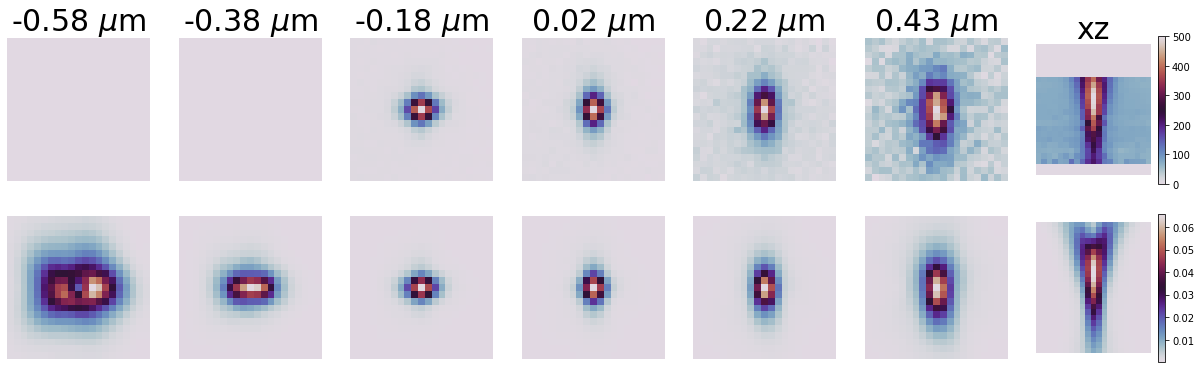

channel 1


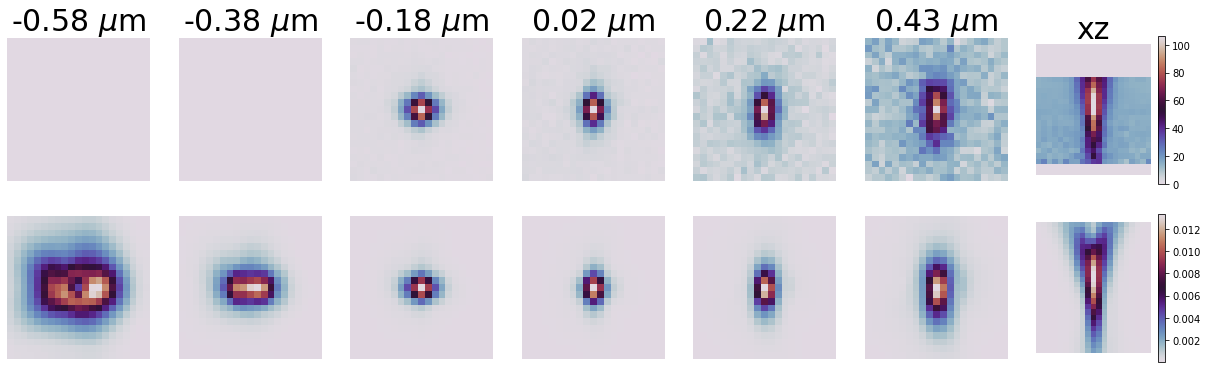

In [6]:
showpsfvsdata_insitu(f,p)

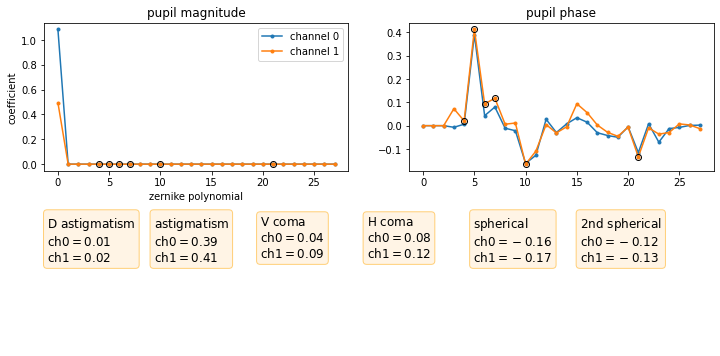

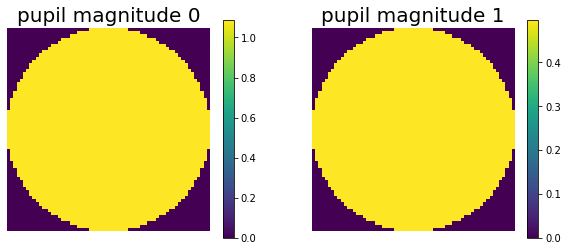

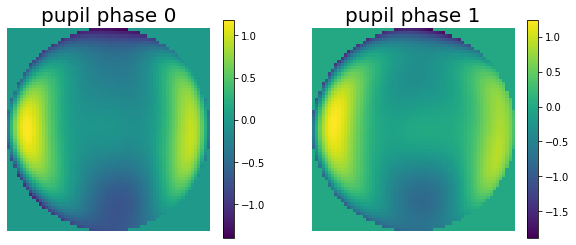

In [7]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

[[ 0.9985 -0.0501 -0.    ]
 [ 0.0505  0.9976  0.    ]
 [-2.6757  4.0524  1.    ]]


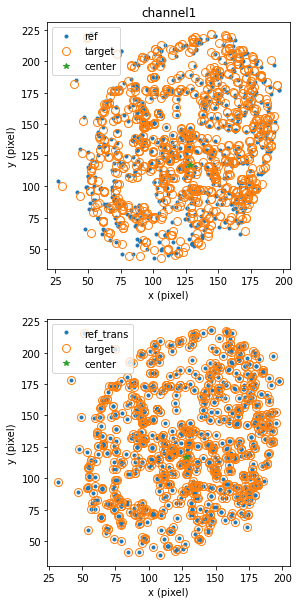

In [8]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

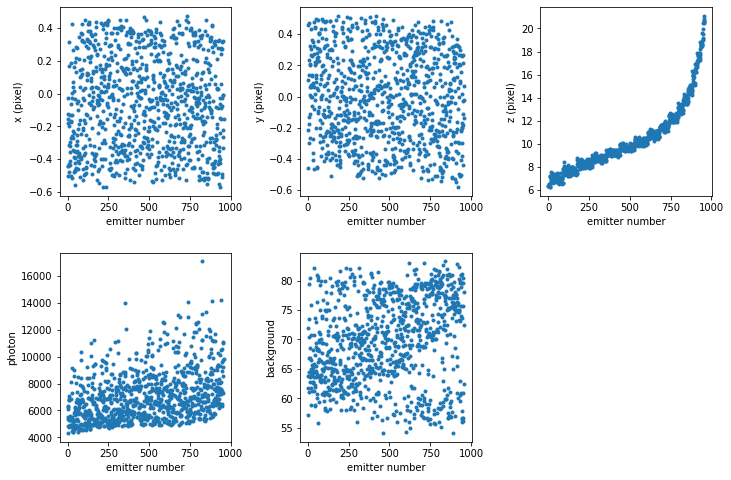

In [9]:
showlearnedparam_insitu(f,p)

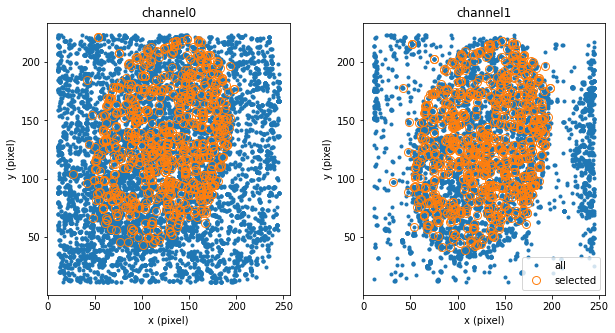

In [10]:
showcoord(f,p)

#### Ouput parameters

In [21]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
